#  Kmeans Assginmnet

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm
> 2. Understand the effect of the parmeters on the performance of the algorithm .
> 3. Understand the effect of distance.

## 1. Write K means function

In [2]:
pip install numpy pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\FadluW\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


import required libraries

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function

write a function to calculate the distance between a set of cluster centroids and all the data points

Cluster_Distances = Distance ( Cluster_Centroids, Data_points, Distance_Type)
* The function shoud be able to handle data points with any number of features and any number of points
* The function should be able to handle any K number of cluster centroids
* To increase speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K
* You should be able to calculate different types of Distance. In this assignment you are required to implement the following two
    - Euclidian distance
    - Pearson correlation distance
  

In [6]:
def Distance ( Cluster_Centroids = np.random.randint(11, size = (3, 2)), Data_points = np.random.randint(11, size = (7, 2)), Distance_Type = "euclidian"):
    if Distance_Type == "pearson":
        print("Pearson Distance")
        countOfClusters = len(Cluster_Centroids)
        countOfDatapoints = len(Data_points)
        Cluster_Distance = np.zeros((countOfClusters, countOfDatapoints), dtype=np.uint32)
        return Cluster_Distance
    else:
        diff = Data_points[:, np.newaxis, :] - Cluster_Centroids[np.newaxis, :, :]
        return np.sqrt(np.sum(diff ** 2, axis=2))

def testDistance():    
    cluster_centroids = np.array([[1, 2], [3, 4], [5, 6]])
    data_points = np.array([[2, 3], [4, 5], [6, 7], [8, 9], [10, 11]])
    
    print(Distance(cluster_centroids, data_points, 'euclidean'))

testDistance()

[[ 1.41421356  1.41421356  4.24264069]
 [ 4.24264069  1.41421356  1.41421356]
 [ 7.07106781  4.24264069  1.41421356]
 [ 9.89949494  7.07106781  4.24264069]
 [12.72792206  9.89949494  7.07106781]]


> ### 1.2. Code for K means function

> Loop until a stopping condition

> > in the loop do the following
> > 1. Cluster Assignmnet
> > > * Use the Distance to calculate between each cluster head and all the points
> > > * Find the value and index of the minimum distance  for each row.
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Update Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center)

In [33]:
def initializeCentroids(Data_points, k):
   N = Data_points.shape[0]
   randomIndices = np.random.choice(N, k, replace=False)
   return Data_points[randomIndices]

def assignClusters(Data_points, centroids, distance_type='euclidean'):
   distances = Distance(centroids, Data_points, distance_type)
   minIndices = np.argmin(distances, axis=1)
   return minIndices, distances[minIndices]

def updateCentroids(Data_points, clusterIndices, k):
   numFeatures = Data_points.shape[1]
   newCentroids = np.zeros((k, numFeatures))
   
   for i in range(k):
      points_in_cluster = Data_points[clusterIndices == i]
      if len(points_in_cluster) > 0:
         newCentroids[i] = np.mean(points_in_cluster, axis=0)
      else:
         newCentroids[i] = Data_points[np.random.choice(Data_points.shape[0])]
   
   return newCentroids

def Kmean(Data_points, Number_of_Clusters, Distance_Type = "euclidean"):
   # write code for intial cluster heads here
   centroids = initializeCentroids(Data_points, Number_of_Clusters)
   tolerance = 0.01

   # write your your loop
   prev_mean_square_dist_sum = None
   while True:
      clusterIndices, minDistances = assignClusters(Data_points, centroids, Distance_Type)
      newCentroids = updateCentroids(Data_points, clusterIndices, Number_of_Clusters)
      
      mean_square_dist_sum = np.mean(minDistances ** 2)
   
      if prev_mean_square_dist_sum is not None:
         diff = abs(prev_mean_square_dist_sum - mean_square_dist_sum)
         if diff < tolerance:
               print("Converged.")
               break
      
      centroids = newCentroids
      prev_mean_square_dist_sum = mean_square_dist_sum

   Cluster_Metric = np.sum(minDistances ** 2)
   return [ clusterIndices , Cluster_Metric, centroids ]

## 2. Display Results

* below is a an example fuction that displayes Clusters in 2D

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures

* The function is a helper function that is originaly be found in
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function

In [37]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
# def display_cluster(X,km=[],num_clusters=0):
#     color = 'brgcmyk'  #List colors
#     alpha = 0.5  #color obaque
#     s = 20
#     if num_clusters == 0:
#         plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
#     else:
#         for i in range(num_clusters):
#             plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
#             plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
import matplotlib.pyplot as plt
import itertools

# Function to display clusters for n-dimensional data in 2D subplots
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'  # List colors for clusters
    alpha = 0.5  # Transparency for points
    s = 20  # Size of points
    n_dims = X.shape[1]  # Number of dimensions in the data

    # Generate all pairs of dimensions to plot
    dim_pairs = list(itertools.combinations(range(n_dims), 2))
    n_plots = len(dim_pairs)  # Number of subplots needed

    # Create a figure with subplots
    fig, axs = plt.subplots(nrows=1, ncols=n_plots, figsize=(5 * n_plots, 5))

    # If there's only one pair of dimensions, axs will not be a list, so we convert it into a list
    if n_plots == 1:
        axs = [axs]

    # Loop over all dimension pairs and plot each pair
    for idx, (dim1, dim2) in enumerate(dim_pairs):
        ax = axs[idx]  # Get the corresponding subplot axis

        # Case 1: No clusters, just display raw data
        if num_clusters == 0:
            ax.scatter(X[:, dim1], X[:, dim2], c=color[0], alpha=alpha, s=s)
            ax.set_title(f'Dim {dim1} vs Dim {dim2}')

        # Case 2: Display clusters and centroids
        else:
            for i in range(num_clusters):
                # Plot the data points in the ith cluster
                ax.scatter(X[km[0] == i, dim1], X[km[0] == i, dim2],
                           c=color[i % len(color)], alpha=alpha, s=s, label=f'Cluster {i}')

                # If distance type is not Pearson, display centroids
                if km[1] is not None :
                    ax.scatter(km[1][i][dim1], km[1][i][dim2],
                               c=color[i % len(color)], marker='x', s=100, label=f'Centroid {i}')
            ax.set_title(f'Clustered Data: Dim {dim1} vs Dim {dim2}')

        ax.set_xlabel(f'Dim {dim1}')
        ax.set_ylabel(f'Dim {dim2}')
        # ax.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

> #### 2.2. Example 1 : Circular Data Gen and display

* below is an example of how to use the funciton
  *  prepare the figure size and background
   > * this part can be replaced by a number of subplots
  
  * Produce a data set that represent the x and y o coordinates of a circle
   > * this part can be replaced by data that you import froma file
  
  * Data is displayed
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction

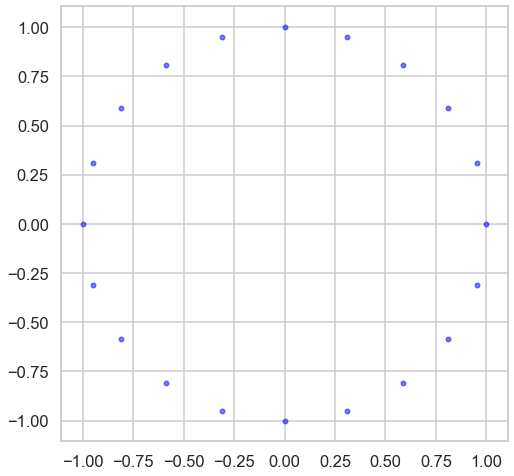

In [ ]:
# prepare the figure sise and background
# this part can be replaced by a number of subplots
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle
# this part can be replaced by data that you import froma file
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display

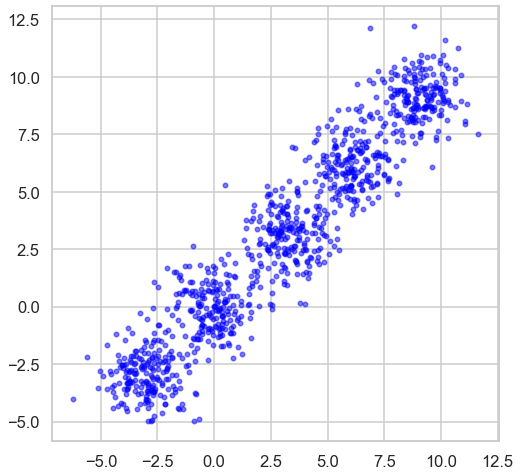

In [ ]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display

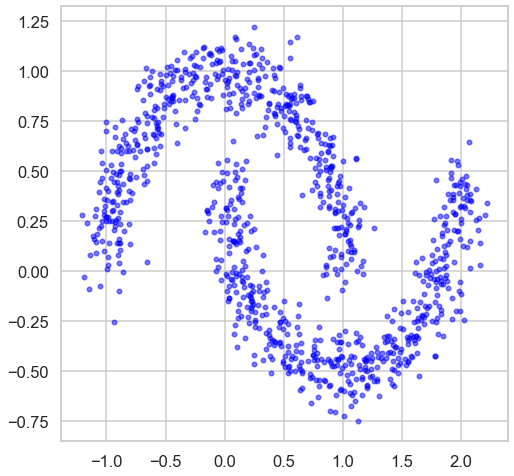

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the Kmean function on Simple 2D
1. Apply the Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps

Converged.


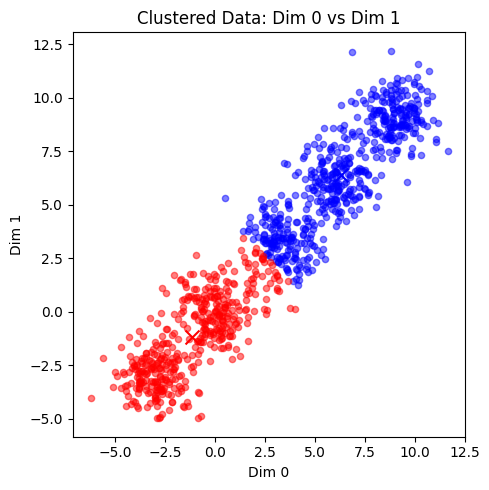

Converged.


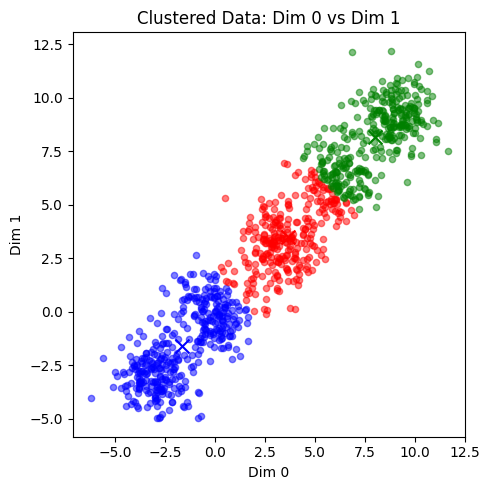

Converged.


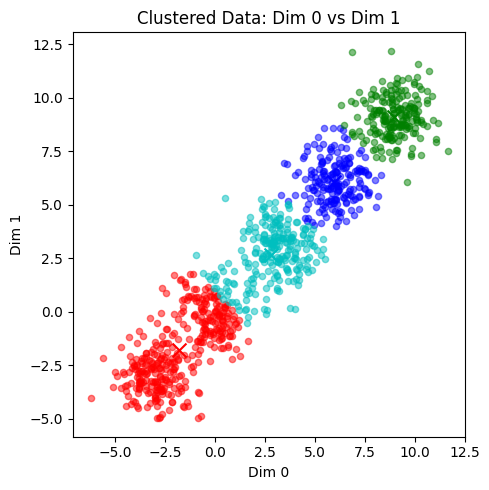

Converged.


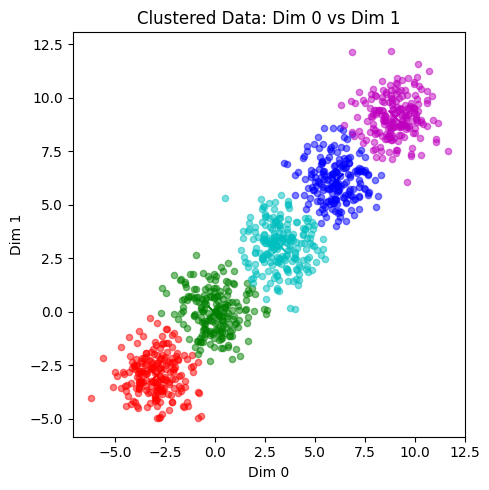

Converged.


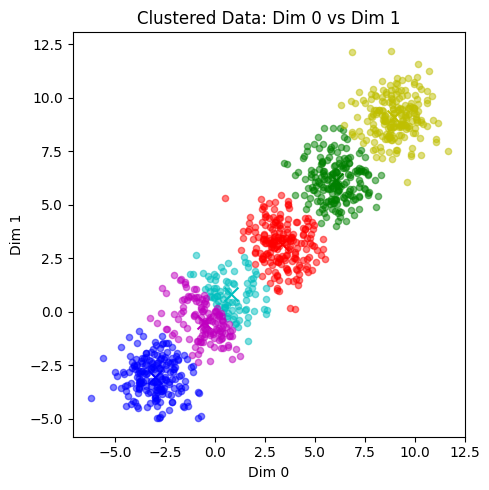

Converged.


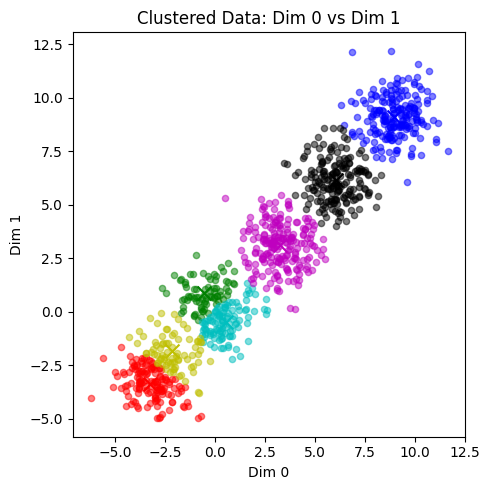

Converged.


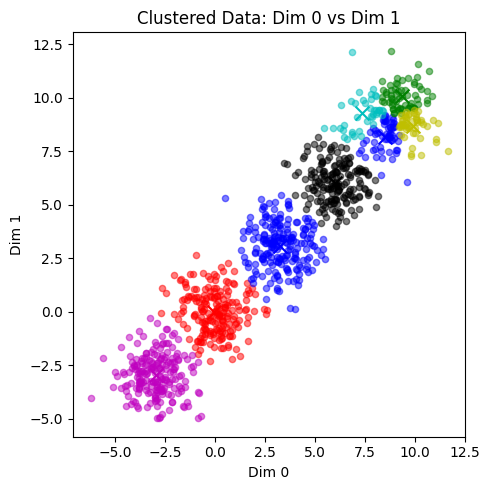

Converged.


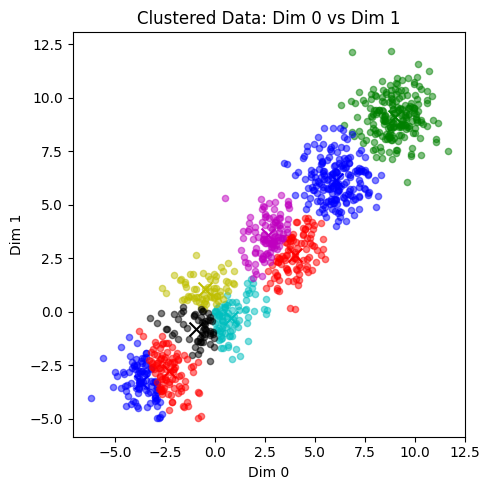

Converged.


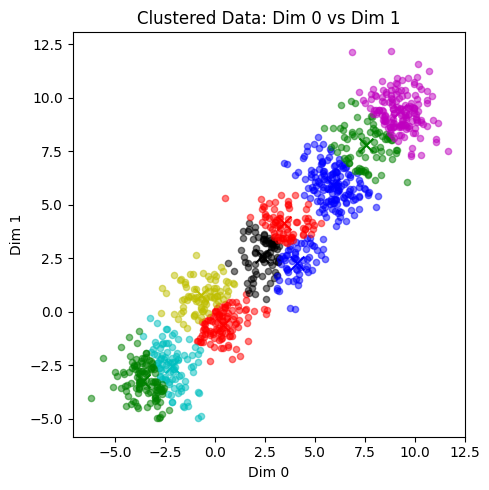

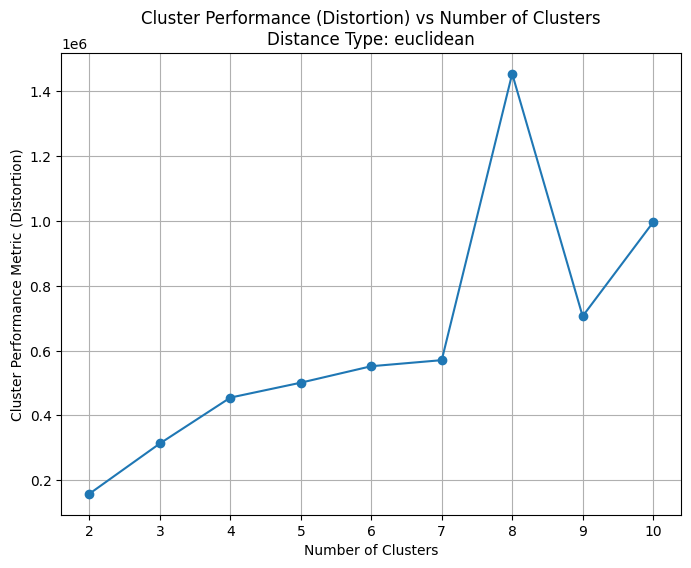

In [39]:
n_samples = 1000

centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
blobs, _ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers, shuffle=False, random_state=42)

moons, _ = make_moons(n_samples=n_samples, noise= .1)


def testKmeans(Data_Points, distanceType): 
    cluster_metrics = []
    for i in range(2,11):
        clusterIndices, cluster_metric, centroids = Kmean(Data_Points, i, distanceType)

        display_cluster(Data_Points, [clusterIndices, centroids], i)

        cluster_metrics.append(cluster_metric)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 11), cluster_metrics, marker='o')
    plt.title(f'Cluster Performance (Distortion) vs Number of Clusters\nDistance Type: {distanceType}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric (Distortion)')
    plt.grid(True)
    plt.show()

# testKmeans(moons, "euclidean")
testKmeans(blobs, "euclidean")

## 4. Using the Kmean function to segment customers int he provided customer dataset
1. Apply the Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps